#### Data Loading and Cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')


In [4]:
# Check for missing values
print("Missing values in Customers dataset:\n", customers_df.isnull().sum())
print("\nMissing values in Products dataset:\n", products_df.isnull().sum())
print("\nMissing values in Transactions dataset:\n", transactions_df.isnull().sum())

Missing values in Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


#### Customer and Product distributions

C:\Users\joshi\AppData\Local\Temp\ipykernel_6172\2711370516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', palette='viridis')


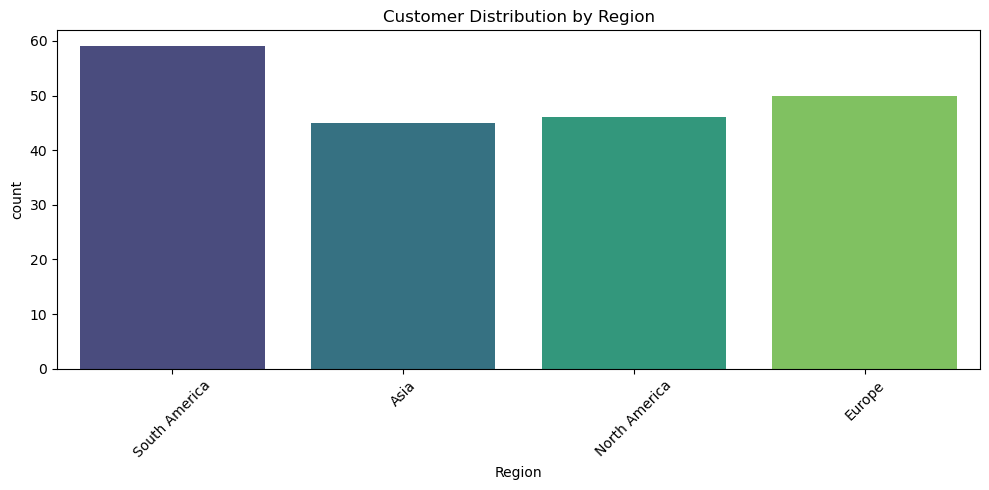

In [5]:
# Plot customer distribution by region
plt.figure(figsize=(10, 5))
sns.countplot(data=customers_df, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_6172\3914180547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x='Category', palette='magma')


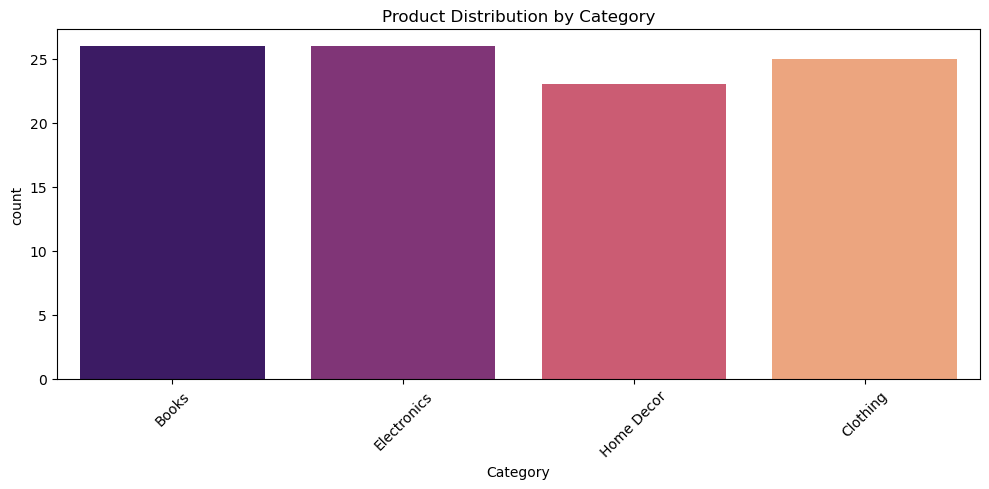

In [32]:
# Plot product distribution by category
plt.figure(figsize=(10, 5))
sns.countplot(data=products_df, x='Category', palette='magma')

plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Sales Trends Over Time

In [7]:
# Monthly sales trend
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

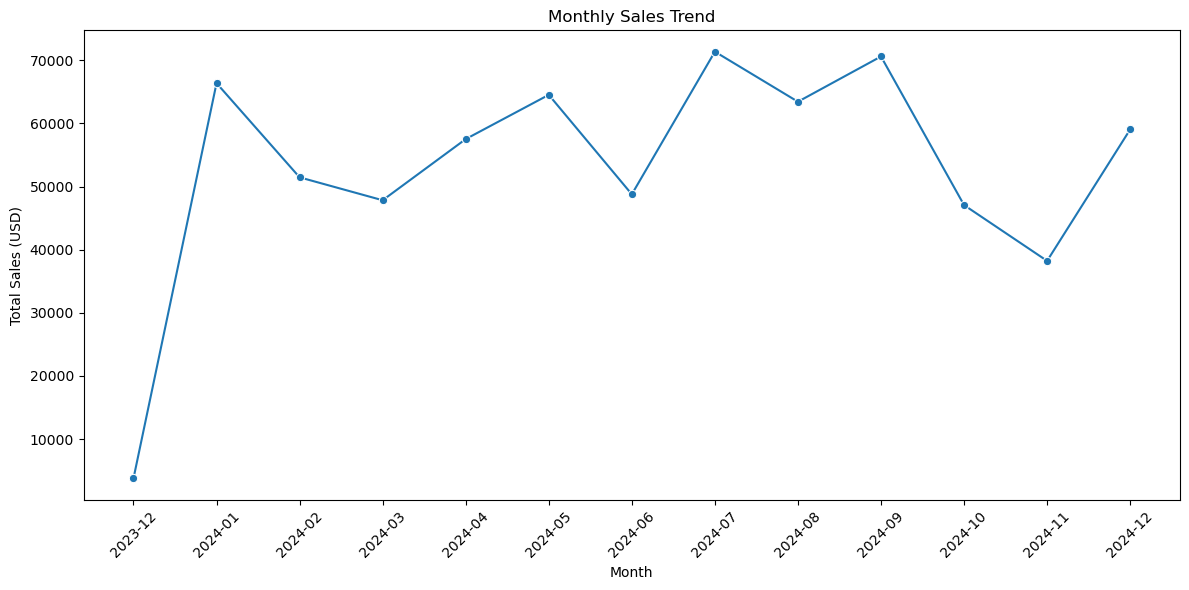

In [8]:
# Plot monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 10 Products by Sales

In [9]:
# Top 10 products based on total sales
top_products = transactions_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
top_products = top_products.merge(products_df, on='ProductID')


C:\Users\joshi\AppData\Local\Temp\ipykernel_6172\2539887969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=top_products, y='ProductName', x='TotalValue', palette='coolwarm')


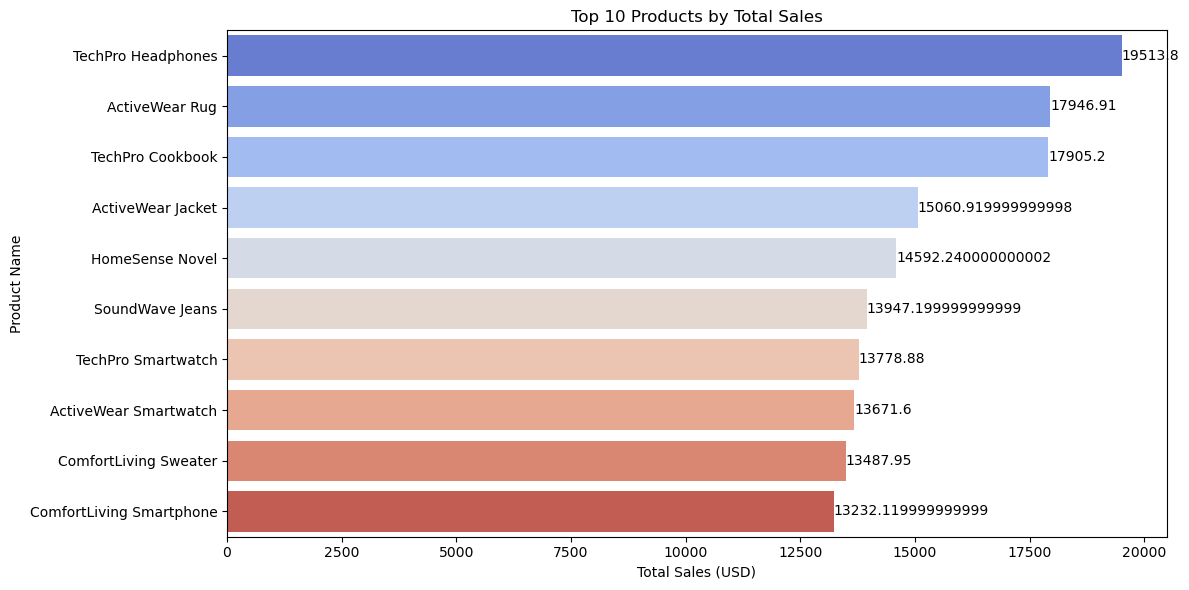

In [29]:
# Plot top 10 products
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=top_products, y='ProductName', x='TotalValue', palette='coolwarm')
for index, value in enumerate(top_products['TotalValue']):
    ax.text(value , index, str(value), color='black', va='center')  # Adjust position as needed
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

#### Most Active Customers

In [11]:
# Top 10 most active customers by number of transactions
active_customers = transactions_df['CustomerID'].value_counts().head(10).reset_index()
active_customers.columns = ['CustomerID', 'TransactionCount']  # Rename for clarity
active_customers = active_customers.merge(customers_df, on='CustomerID', how='left')



C:\Users\joshi\AppData\Local\Temp\ipykernel_6172\1506844969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=active_customers, y='CustomerName', x='TransactionCount', palette='Blues_r')


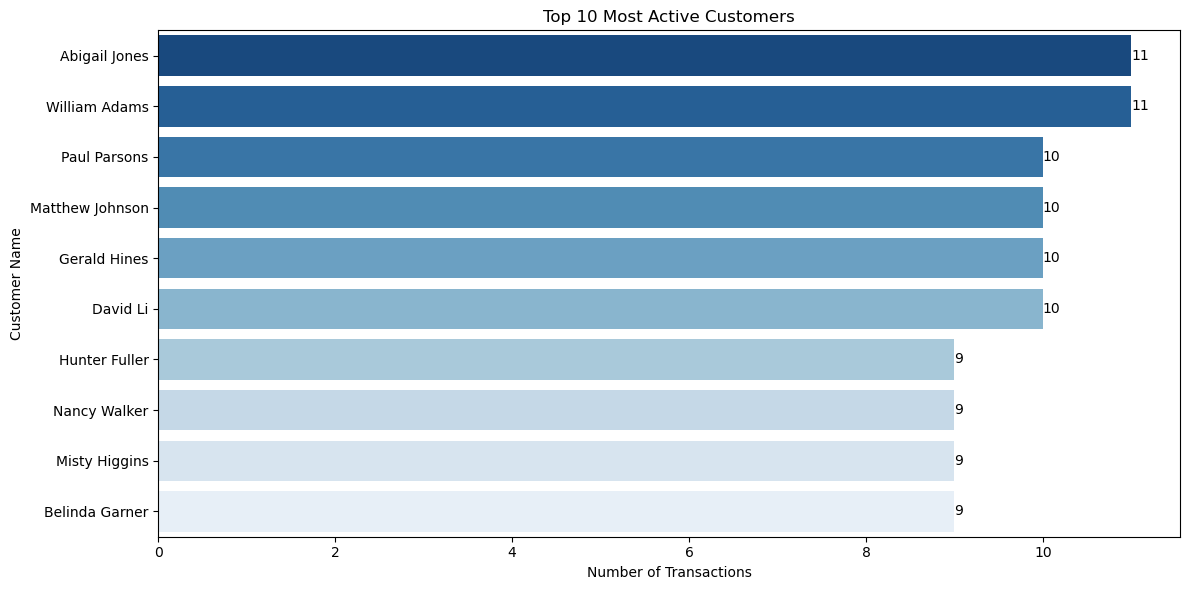

In [25]:
# Plot most active customers
plt.figure(figsize=(12, 6))
# sns.barplot(data=active_customers, y='CustomerName', x='TransactionCount', palette='Blues_r')
ax = sns.barplot(data=active_customers, y='CustomerName', x='TransactionCount', palette='Blues_r')


for index, value in enumerate(active_customers['TransactionCount']):
    ax.text(value , index, str(value), color='black', va='center')  # Adjust position as needed

plt.title('Top 10 Most Active Customers')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()